# COURSE: A deep understanding of deep learning
## SECTION: Measuring model performance
### LECTURE: APRF example 1: wine quality
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202210

In [1]:
### import libraries
import copy

# for DL modeling
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# for number-crunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\lucan\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\lucan\AppData\Local\Temp\ipykernel_19128\213078501.py:21: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Create classes

In [53]:
net_noseed = nn.Sequential(
  nn.Linear(2,8),   # input layer
  nn.Linear(8,1),   # hidden layer
  nn.Linear(1,1),   # output layer
)

net_rs1a = copy.deepcopy(net_noseed)
net_rs2 = copy.deepcopy(net_noseed)
net_rs1b = copy.deepcopy(net_noseed)

# Set seeds and randomize weights

In [54]:
weights = [np.array([])] * 4

for p in net_noseed.named_parameters():
  if 'weight' in p[0]:
    weights[0] = np.concatenate( (weights[0], p[1].data.numpy().flatten()), axis=0 )

torch.manual_seed(1998)
for p in net_rs1a.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)
    weights[1] = np.concatenate( (weights[1], p[1].data.numpy().flatten()), axis=0 )

torch.manual_seed(2022)
for p in net_rs2.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)
    weights[2] = np.concatenate( (weights[2], p[1].data.numpy().flatten()), axis=0 )

torch.manual_seed(1998)
for p in net_rs1b.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)
    weights[3] = np.concatenate( (weights[3], p[1].data.numpy().flatten()), axis=0 )

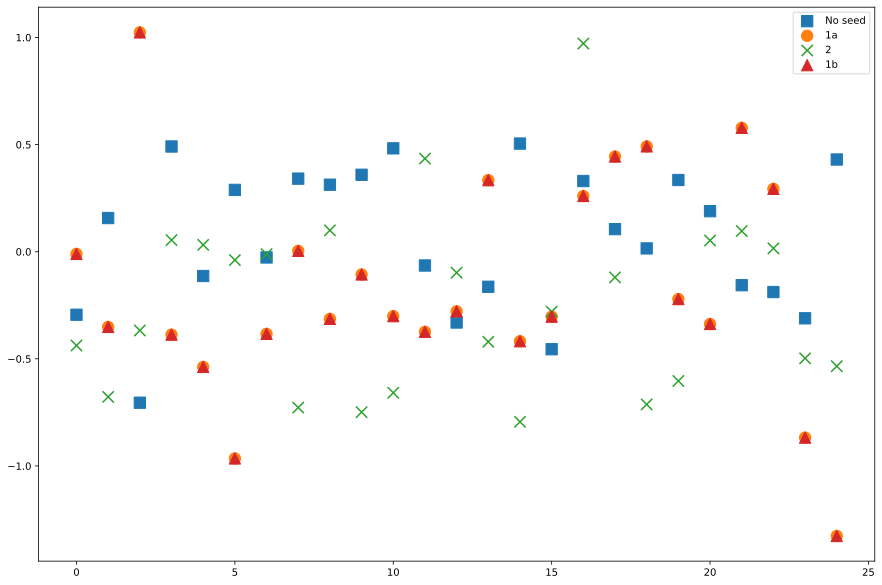

In [55]:
plt.figure(figsize=(15, 10))

labels = ["No seed", "1a", "2", "1b"]
markers = ['s', 'o', 'x', '^']

for i in range(4):
  plt.scatter(range(len(weights[i])), weights[i], marker=markers[i], s=128, label=labels[i])

plt.legend()

plt.show()

In [56]:
print(weights[1] - weights[3])
print(weights[1] - weights[0])
print(weights[1] - weights[2])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[ 0.28405346 -0.50824451  1.7286365  -0.87814516 -0.42430657 -1.25349468
 -0.35668951 -0.33708661 -0.62626871 -0.46519975 -0.78322569 -0.30950063
  0.05215892  0.4975045  -0.9226701   0.15220195 -0.06982136  0.33903134
  0.47616929 -0.55569182 -0.52650067  0.734576    0.48154375 -0.55681822
 -1.75721395]
[ 0.42757525  0.32666224  1.39150569 -0.44128156 -0.5697474  -0.92599103
 -0.37204458  0.73145325 -0.41324873  0.64276394  0.35781333 -0.80859676
 -0.18027063  0.75412828  0.37616137 -0.02306923 -0.7117596   0.56427727
  1.20434362  0.38234101 -0.38960876  0.4816342   0.27772553 -0.37006527
 -0.79237586]
